In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/content/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

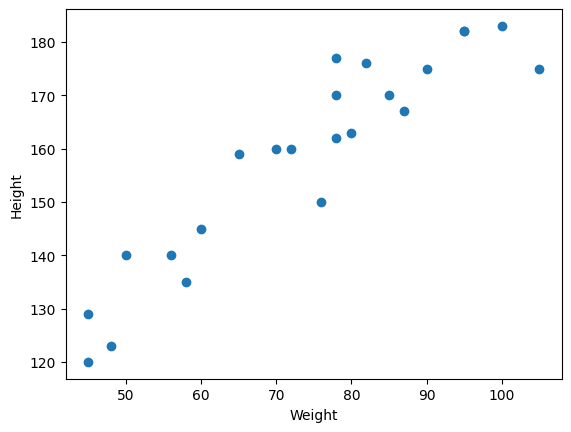

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
# divide the data into the dependant and indep features
X = df[['Weight']]
y = df['Height']

In [10]:
#train test split of the data
# so we can train and test the dataset and the modle performance efficiently
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# test size means 20 records per 100 records, ie 20% of the data will be the test data from the dataset
# random state is like the seed in minecraft

In [11]:
X.shape

(23, 1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [15]:
# standarize the dataset , train independent data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# model shouldnt know anything aboyt the test data

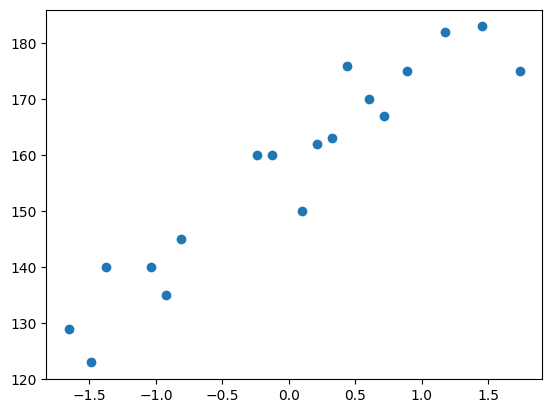

In [16]:
plt.scatter(X_train, y_train)

In [18]:
# train the model simple lin reg model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print("the slope of weight is :", regressor.coef_)
print("intercept is", regressor.intercept_)

the slope of weight is : [17.03440872]
intercept is 157.5


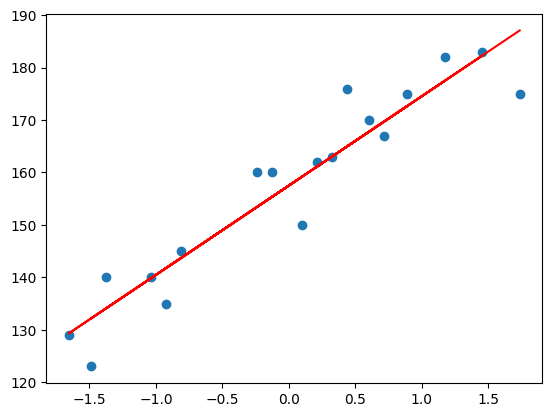

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [33]:
y_pred_test = regressor.predict(X_test)

In [34]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

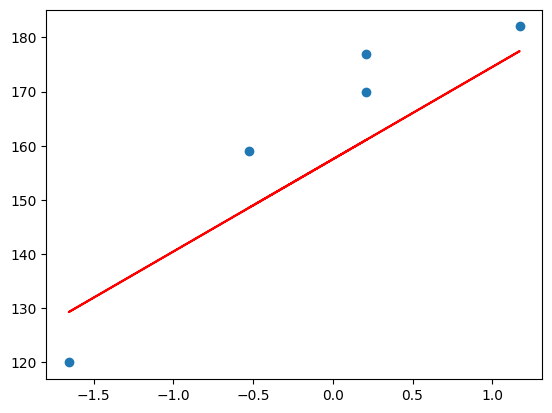

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

***Performance Metrics***

MSE
MAE
RMSE
R^2
Adjusted R^2

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("MSE = ", mse)
print("MAE = ", mae)
print("RMSE = ", rmse)

MSE =  109.77592599051658
MAE =  9.822657814519232
RMSE =  10.477400726827078


In [40]:
score = r2_score(y_test , y_pred_test)
# ## R square
# Formula
# **R^2 = 1 - SSR/SST**
# R^2	=	coefficient of determination
# SSR	=	sum of squares of residuals
# SST	=	total sum of squares
score

0.776986986042344

In [41]:
# **Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

# where:

# R2: The R2 of the model
# n: The number of observations
# k: The number of predictor variables

adjr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjr

0.7026493147231252

In [53]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

array([[80.]])

In [54]:
scaled_weight[0]

array([80.])

In [55]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [1520.25269753]


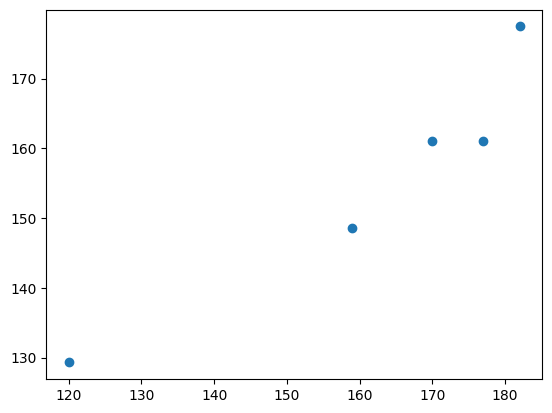

In [46]:
# we take Assumpotions for a v good model
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

# if scatter plot is linearly distributed, then its a good prediction

In [49]:
## Residuals
residuals = y_test - y_pred_test
residuals


,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<ipython-input-50-759a53f65f8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals , kde = True)


<Axes: xlabel='Height', ylabel='Density'>

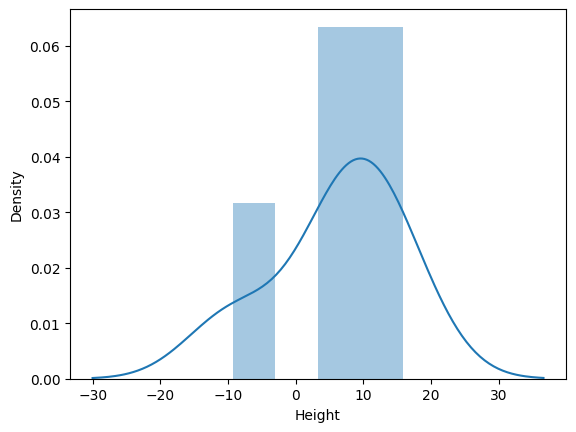

In [50]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals , kde = True)

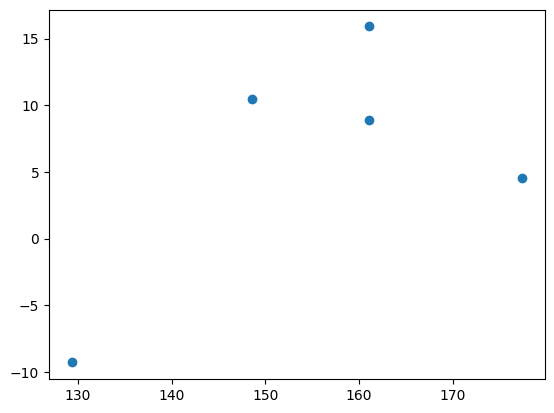

In [52]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test , residuals)

# scatter should be a uniform distributioun, then its a good model